# **SC3000 Lab 1 Assignment**
# **Team Name: AI Triad**

# Tutorial and Sample Code for Balancing a Pole on a Cart

## **Project done by:**##
1. Keh Jing Xiang (U2320460L)
2. Chow Weng Shi (U2320760B)
3. Choo Zhen Ming (U2320950J)

## **Contributions:**##
1. Keh Jing Xiang


*   Researched on the Q-Learning reinforcement agent
*   Generated the initial codes of Q-Learning agent
*   Tested the code to be functional and working
*   Fine tuning the parameters & run the training multiple times to improve accuracy
*   Finalized the codes
*   Added explanations to the codes


2. Chow Weng Shi


*   Researched on the Q-Learning reinforcement agent
*   Fine tuning the parameters & run the training multiple times to improve accuracy
*   Plotted the graphs using matplotlib
*   Generated the comments for the codes to make it more readible
*   Added explanations to the codes



3. Choo Zhen Ming


*   Researched on the Q-Learning reinforcement agent
*   Fine tuning the parameters & run the training multiple times to improve accuracy
*   Generated the comments for the codes to make it more readible
*   Added explanations to the codes
*   Finalized and formatted the jupyter file







## **All References:** ##


1.   https://github.com/yue-zhongqi/cartpole_colab/blob/main/cartpole.ipynb
2.   https://github.com/JackFurby/CartPole-v0/blob/master/cartPole.py
3.   https://karan-jakhar.medium.com/100-days-of-code-day-4-6fbc672171e4
4.   https://www.baeldung.com/cs/epsilon-greedy-q-learning
5.   https://lazyprogrammer.me/what-is-the-difference-between-epsilon-greedy-and-epsilon-soft-policies/
6.   All materials from the NTU SC3000 course



## Installing dependencies:

In [ ]:
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!pip install gym[classic_control]
!apt-get update > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1
!pip install ez_setup > /dev/null 2>&1

Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 4, in <module>
    from pip._internal.cli.main import main
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/main.py", line 11, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/main_parser.py", line 9, in <module>
    from pip._internal.build_env import get_runnable_pip
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/build_env.py", line 19, in <module>
    from pip._internal.cli.spinners import open_spinner
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/spinners.py", line 9, in <module>
    from pip._internal.utils.logging import get_indentation
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/util

## Importing dependencies and define helper functions

In [ ]:
import gym
from gym import logger as gymlogger
from gym.wrappers import RecordVideo
gymlogger.set_level(40) # error only
import tensorflow as tf
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay

def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else:
    print("Could not find video")

## Tutorial: Loading CartPole environment

## **Interacting with the CartPole environment:**

References
*   https://github.com/yue-zhongqi/cartpole_colab/blob/main/cartpole.ipynb



In [ ]:
env = gym.make("CartPole-v1")

We can check the action and observation space of this environment. Discrete(2) means that there are two valid discrete actions: 0 & 1.

In [ ]:
print(env.action_space)

Discrete(2)


The observation space is given below. The first two arrays define the min and max values of the 4 observed values, corresponding to cart position, velocity and pole angle, angular velocity.

In [ ]:
print(env.observation_space)

Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)


We call each round of the pole-balancing game an "episode". At the start of each episode, make sure the environment is reset, which chooses a random initial state, e.g., pole slightly tilted to the right. This initialization can be achieved by the code below, which returns the observation of the initial state.

In [ ]:
observation = env.reset()
print("Initial observations:", observation)

Initial observations: [ 0.0408293  -0.01860873 -0.0387244   0.00154426]


For the CartPole environment, there are two possible actions: 0 for pushing to the left and 1 for pushing to the right. For example, we can push the cart to the left using code below, which returns the new observation, the current reward, an indicator of whether the game ends, and some additional information (not used in this project). For CartPole, the game ends when the pole is significantly tilted or you manage to balance the pole for 500 steps. You get exactly 1 reward for each step before the game ends (i.e., max cumulative reward is 500).

In [ ]:
observation, reward, done, info = env.step(0)
print("New observations after choosing action 0:", observation)
print("Reward for this step:", reward)
print("Is this round done?", done)

New observations after choosing action 0: [ 0.03619404 -0.40770382 -0.03305828  0.5619945 ]
Reward for this step: 1.0
Is this round done? False


Now we can play a full round of the game using a naive strategy (always choosing action 0), and show the cumulative reward in the round. Note that reward returned by env.step(*) corresponds to the reward for current step. So we have to accumulate the reward for each step. Clearly, the naive strategy performs poorly by surviving only a dozen of steps.

In [ ]:
observation = env.reset()
cumulative_reward = 0
done = False
while not done:
    observation, reward, done, info = env.step(0)
    cumulative_reward += reward
print("Cumulative reward for this round:", cumulative_reward)

Cumulative reward for this round: 10.0


## Task 1: Development of an RL agent

An example of a naive agent is given below, which randomly chooses an action regardless of the observation:

In [ ]:
def rand_policy_agent(observation):
    return random.randint(0, 1)

For Task 1, we can show the observation and chosen action below:

In [ ]:
observation = env.reset()
action = rand_policy_agent(observation)
print("Observation:", observation)
print("Chosen action:", action)

Observation: [ 0.04652948 -0.00316553 -0.03565305  0.01599804]
Chosen action: 1


# **Q-Learning** #
Q-learning is a model-free, temporal difference reinforcement learning algorithm that helps an agent learn an optimal policy in an environment without prior knowledge. It uses a Q-table to store and update action values based on rewards received.


---


### **Q-Value Calculation:** ###
The equation for calculating q-values is as follows:

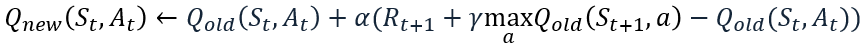

*   **α** : Represents the learning factor
*   **γ** : Represnts the discount factor

**Reference:**

NTU SC3000 Course Lecture Material

---

### **Epsilon-Greedy Action Selection & Epsilon-Soft Policy** ###
In Q-learning the concept of exploiting what the agent already knows versus exploring a random action is called the exploration-exploitation trade-off. Through exploring, the agent can improve its current knowledge and gain better rewards in the long run. However, it gets more rewards immediately through exploiting what it has learnt. Since the agent cannot do both at the same time, there is a trade-off. It is important to keep a balance between exploration and exploitation.

Thus, this is where epsilon-greedy action selection strategy comes in, the agent uses both exploitations to take advantage of prior knowledge and exploration to look for new options:

*   **Exploration Probability (EP)**
*   **Exploration Decay (ED)**
*   **Minimum Exploration Probability (MEP)**

### **How it works** ###
Our Q-Learning agent would generate a random number between 0 and 1 and compare it with EP. If it is smaller than EP, the agent would choose exploration, or else it would choose to exploit its learnt knowledge from the q-table. The EP would start out high at 1 to ensure it explores as much as possible at the start and slowly decreases to EP * ED with each iteration to increase probability of exploitation slowly. The MEP is utilized following the Epsilon-Soft Policy so that the chances of our agent choosing to explore is never too small for it not to happen so that the agent has a lower probability of being stuck to a sub-optimal solution.

---

### **References:** ##
*   https://www.baeldung.com/cs/epsilon-greedy-q-learning
*   https://lazyprogrammer.me/what-is-the-difference-between-epsilon-greedy-and-epsilon-soft-policies/

---


## **Action & State Space:**
**Action Space:**

Action space is the set of discrete action that our agent can take when interacting with the environment. In this case, our cartpole environment only has 2 possible action as stated in the lab manual:

*   **0** : Move cart to the left
*   **1** : Move cart to the right



**Observation Space:**

As stated in the lab manual, our observation space consists of a combination of 4 values which are continuous:


*   **Cart Position:**  [-4.8, 4.8]
*   **Cart Velocity:**  (-inf, inf)
*   **Pole Angle:**  [-0.418 rad, 0.418 rad]
*   **Pole Angular Velocity:**  (-inf, inf)




In [ ]:
# Set stateSpace to 4 (Cart Position, Cart Velocity, Pole Angle, Pole Angular Velocity)
stateSpace = 4

# Set actionSpace to 2 (Left, Right)
actionSpace = 2

## **Initialization of Q-Table and Discretized Bins** ##
Next, we discretise the state space by dividing each state variable into 100 bins and initialise the Q-table with dimensions [100,100,100,100,2]. The first four dimensions represent the discretized state space. The last dimension represents the two possible actions. The table stores Q-values for each state-action pair, initially set to zero.

*   **Discretized Bins** are created with np.linspace()
*   **Q-Table** is initialized with np.zeros()

In [ ]:
# Set binSize to 100 to provide a balance between accuracy and computational efficiency
binSize = 100

# Split the continuous state space into discrete state space
bins = [np.linspace(-4.8, 4.8, binSize), # Cart Position
       np.linspace(-12, 12, binSize), # Cart Velocity (set to -12 to capture most observed velocities)
       np.linspace(-0.418, 0.418, binSize), # Pole Angle
       np.linspace(-12, 12, binSize)] # Pole Angular Velocity (set to -12 to capture most observed velocities)

qTable = np.zeros(([binSize] * stateSpace + [actionSpace]))

## **Convert continuous to discrete state** ##
We define a function get_discrete_space to convert a continuous state into the nearest discrete state and return the index of the discrete state in the Q-table.


**Reference:**

https://github.com/JackFurby/CartPole-v0/blob/master/cartPole.py

In [ ]:
def get_discrete_state(state):
    discrete_state = []
    for i in range(len(state)):
        index = np.digitize(state[i], bins[i]) - 1  # Get digitized index
        index = np.clip(index, 0, binSize - 1) # Ensure it's within [0, binSize - 1]
        discrete_state.append(index)
    return tuple(discrete_state)  # Convert to tuple for Q-table indexing

## **Define Hyperparameters:** ##
We move on to determine the hyperparameters for Q-learning. After trying multiple combinations of hyperparameters, we define the hyperparameters as follow:

In [ ]:
# Define hyperparameters
learning_rate = 0.18 # Controls how much new information overrides old Q-value
discount_factor = 0.99 # Determines how much future rewards are for better pole balance in a long-term
exploration_prob = 1.0  # High exploration probability to ensure full exploration at the start
exploration_decay = 0.9999  # Encourage longer exploration before exploitation
min_exploration_prob = 0.01 # Ensure minimum exploration

Initially a high learning rate of 0.8 was used to speed up learning which led to instability as old experiences were replaced by new ones too quickly, causing inconsistent learning. Thus we decided to lower the learning rate to 0.18 so updates to the Q-table are more stable which can lead to higher accuracy over a longer training period.

Initially we used 100 episodes as the training terminating condition, and our agent is able to achieve a score of 490 or above most of the time, and a score of 500 very rarely. This is because some rare environments are introduced which causes the agent to be unable to react correctly as the agent either had not encountered them enough or had not learned to handle them properly. Thus, we changed the training termination condition (episodes) from 100 to 150 to ensure that the agent can remain consistent over an extended period, reducing overfitting to common scenarios by introducing more of these rare environments for training.

---

For training of the Q-learning agent, we let the model to train until it reaches a relatively stable stage instead of defining the number of training episodes. The model will stop when it encounter 150 continuous episodes that survived 500 turns. Throught the training, the model will starts with high probability of exploration to find the best strategy and gradually switch to exploitation along with the increase of training loops. We modify the reward to increase the penalty for failing to balance the pole.

## **Q-Learning Agent Training**##
References:

*   https://github.com/JackFurby/CartPole-v0/blob/master/cartPole.py
*   https://www.baeldung.com/cs/epsilon-greedy-q-learning

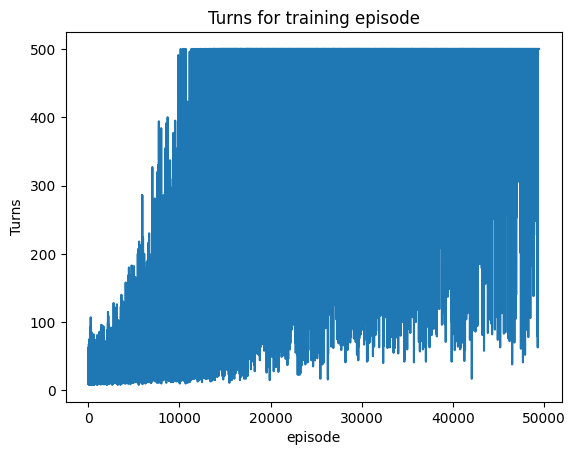

In [ ]:
# Training loop
turns_per_episode = []
fullMarksEpisodes = 0
while fullMarksEpisodes < 150: # Keep training until 150 continuous episodes that survived 500 turns
    state = env.reset()  # Reset environment
    state += np.random.uniform(-0.05, 0.05, size=state.shape) # Introduce small perturbation after resetting the environment
    discrete_state = get_discrete_state(state) # Convert continuous state into discrete representation for Q-table
    done = False
    turn = 0

    while not done and turn < 500:
        # Choose action (exploration vs exploitation)
        if np.random.rand() < exploration_prob:
            action = np.random.randint(0, actionSpace)  # Random action (exploration)
        else:
            action = np.argmax(qTable[discrete_state])  # Best known action (exploitation)

        # Perform action in environment
        new_state, reward, done, info = env.step(action)
        new_discrete_state = get_discrete_state(new_state)

        if done:
            reward -= 100 # Penalize if episode ends

        if not done:
          reward += 50 # Reward if episode does not ends


        # Q-learning update formula
        best_future_q = np.max(qTable[new_discrete_state]) # Finds the highest Q-value for next state
        qTable[discrete_state + (action,)] += learning_rate * (reward + discount_factor * best_future_q - qTable[discrete_state + (action,)])

        # Update state
        discrete_state = new_discrete_state
        turn += 1

    # Gradually decrease exploration probability
    exploration_prob = max(min_exploration_prob, exploration_prob * exploration_decay)
    turns_per_episode.append(turn)

    # Keep track the numbers of continuous episodes that survived 500 turns
    if turn == 500:
      fullMarksEpisodes += 1
    else:
      fullMarksEpisodes = 0

# Graph Plotting and Visualization
episode_results = np.array(turns_per_episode)
plt.plot(episode_results)
plt.title('Turns for training episode')
plt.ylabel('Turns')
plt.xlabel('episode')
plt.show()


The graph shows that our agent is successful as the number of turns achievable with each episode increment is gradually increasing until the maximum turn of 500 is achieved, indicating that our agent gets more and more accurate as the training goes on.

We then define a reinforcement learning agent RL_agent that takes the observation as input and returns the action to be taken based on the learned Q-table.

In [ ]:
def RL_agent(observation):
    discrete_state = get_discrete_state(observation)
    action = np.argmax(qTable[discrete_state])
    return action

The example observation and chosen action are shown.

In [ ]:
observation = env.reset()
action = RL_agent(observation)
print("Observation:", observation)
print("Chosen action:", action)

Observation: [-0.01379638  0.0170632   0.00573485  0.03344827]
Chosen action: 0


## Task 2: Demonstrate the effectiveness of the RL agent

For this task, use the agent developed in Task 1 to play the game for 100 episodes (refer to tutorial for how to play a round), record the cumulative reward for each round, and plot the reward for each round. A sample plotting code is given below. Note that you must include code to play for 100 episodes and use the code to obtain round_results for plotting. DO NOT record the round results in advance and paste the results to the notebook.

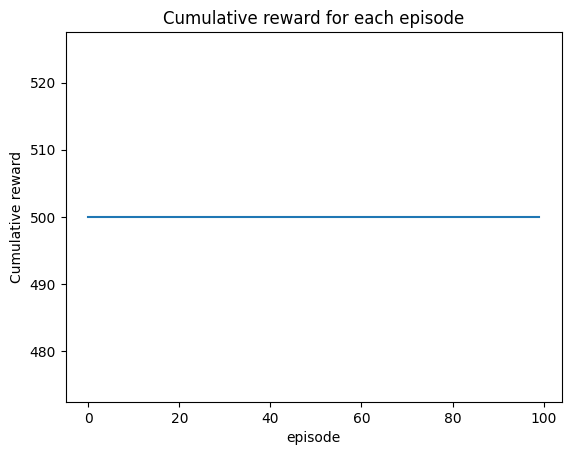

In [ ]:
results = list()
for i in range(100):
    observation = env.reset()
    cumulative_reward = 0
    done = False
    while not done:
        action = RL_agent(observation)
        observation, reward, done, info = env.step(action)
        cumulative_reward += reward
    results.append(cumulative_reward)

episode_results = np.array(results)
plt.plot(episode_results)
plt.title('Cumulative reward for each episode')
plt.ylabel('Cumulative reward')
plt.xlabel('episode')
plt.show()

From the graph, a steady blue straight line at cumulative reward of 500, which is the maximum achievable reward. This indicates that our agent is extremely effective which allowed us to achieve a perfect score for every episode.

Print the average reward over the 100 episodes.

In [ ]:
print("Average cumulative reward:", episode_results.mean())
print("Is my agent good enough?", episode_results.mean() > 195)

Average cumulative reward: 500.0
Is my agent good enough? True


## Task 3: Render one episode played by the agent

Plug your agent to the code below to obtain rendered result.

In [ ]:
np.bool8 = np.bool_
env = RecordVideo(gym.make("CartPole-v1"), "./video")
observation = env.reset()
while True:
    env.render()
    # your agent goes here
    # action = rand_policy_agent(observation)
    action = RL_agent(observation)
    observation, reward, done, info = env.step(action)
    if done:
      break;
env.close()
show_video()